In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/thk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/thk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load the CSV file into a pandas DataFrame
file_path = './data/kakao_data_1121.csv'
df = pd.read_csv(file_path)

In [6]:
# Extract the conversation data from the third column
conversation_data = df['Message'].astype(str)

In [7]:
# Tokenize the text
tokenized_conversations = [word_tokenize(message) for message in conversation_data]

In [8]:
# Remove stopwords
stop_words = set(stopwords.words('english'))  # You may need to adjust the language
filtered_conversations = [
    [word.lower() for word in message if word.isalnum() and word.lower() not in stop_words]
    for message in tokenized_conversations
]

In [9]:
# Apply stemming
stemmer = PorterStemmer()
stemmed_conversations = [
    [stemmer.stem(word) for word in message]
    for message in filtered_conversations
]

In [10]:
# Assuming filtered_conversations is the final preprocessed data
df['Processed_Message'] = [' '.join(message) for message in filtered_conversations]
df.to_csv('./result/kakao_preprocessed_data_1121.csv', index=False)

In [11]:
import matplotlib.pyplot as plt

# Assuming filtered_conversations is the final preprocessed data
message_lengths = [len(message) for message in filtered_conversations]

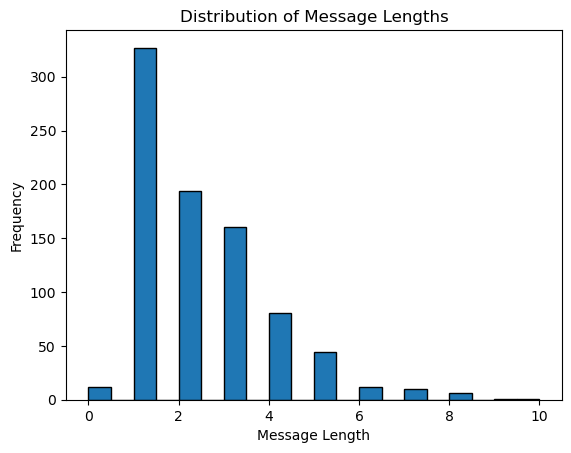

In [12]:
plt.hist(message_lengths, bins=20, edgecolor='black')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.show()

In [13]:
from wordcloud import WordCloud

In [14]:
import matplotlib

In [15]:
# Combine all tokenized messages into a single list of words
all_words = [word for message in tokenized_conversations for word in message]

In [16]:
# Create a string from the list of words
text = ' '.join(all_words)

In [17]:
# Generate a word cloud
wordcloud = WordCloud(
  font_path='/Library/Fonts/Arial Unicode.ttf',
  width=800, height=400, background_color='white').generate(text)

In [ ]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()